<a href="https://colab.research.google.com/github/pawel-kowal/studies/blob/main/python_w_praktyce/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import cv2 
import os 
from matplotlib import pyplot as plt

print(os.getcwd())

/content/drive/MyDrive/PYTHON SGGW


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd '/content/drive/MyDrive/PYTHON SGGW'

/content/drive/MyDrive/PYTHON SGGW


In [33]:
print(os.getcwd())
print(os.listdir())

face_cascade = cv2.CascadeClassifier('./classifiers/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./classifiers/haarcascades/haarcascade_eye.xml')

/content/drive/MyDrive/PYTHON SGGW
['lew.jpg', 'zyrafa.jpg', 'kangur.jpg', 'małpa.jpg', 'opencv_get_set_pixel_value.ipynb', 'EP_3.xlsx', 'ekonometria_przestrzenna_3.ipynb', 'learn.ipynb', 'opencv_load_display_save_image.ipynb', 'opencv_create_chessboard.ipynb', 'Untitled0.ipynb', 'zjazd_1405.ipynb', 'classifiers', 'face_recognition.ipynb']


In [34]:
image = cv2.imread("./classifiers/man_in_shirt.jpg")

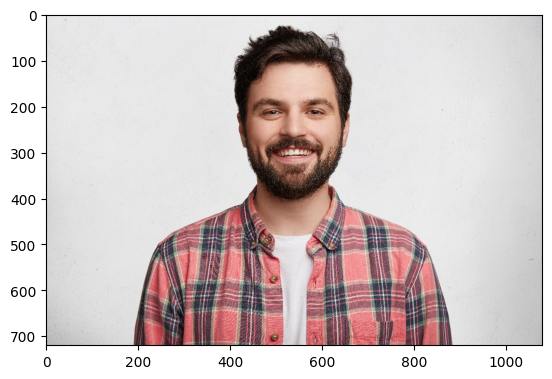

In [35]:
image = cv2.resize(image,(1080,720))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

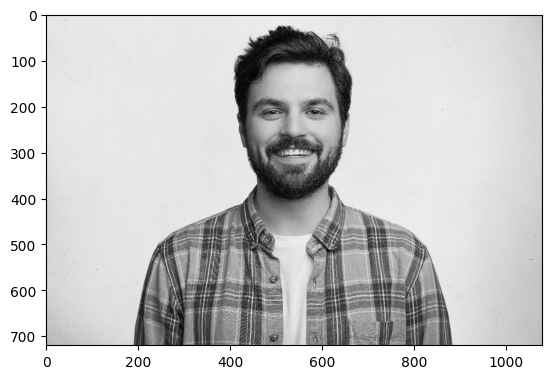

In [36]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

In [37]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0),2)
  roi_gray=gray[y:y+h, x:x+w]

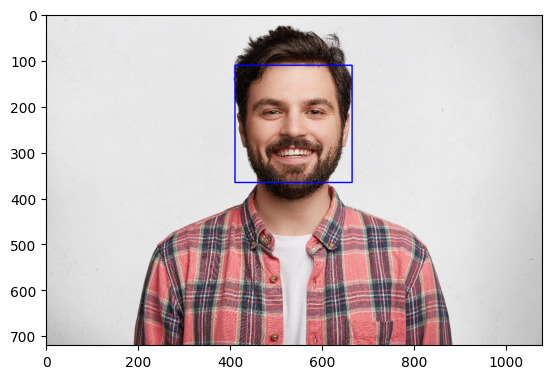

In [38]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [39]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0),2)
  roi_gray=gray[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, minSize=(40,40))
  for(ex,ey,ew,eh) in eyes:
    cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew,y+ey+eh), (0,255,0),2)


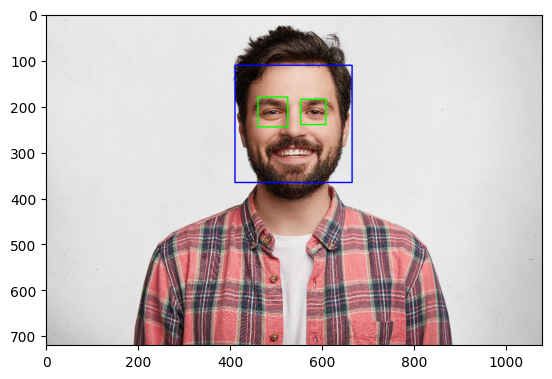

In [40]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))